Hola!

Mi nombre es Miguel Gutierrez y revisare tu proyecto ! 

Cuando vea un error la primera vez, lo señalare. Dejare que encuentres la solucion. Tambien en el texto hare algunas observaciones de como podrias mejorar el codio y tambien hare comentarios de tus percepciones sobre el tema. Si no pueds manejar la tarea, te dare una pista precisa en la siguiente iteraciones y algunos ejemplos practicos. Estare abierto a cualquierda duda y discusion respecto al tema. En general los comentarios de advertencia tu decides si tomarlos o no. No es necesario que acates todos los cambios de advertencia.

Encontraras mis comentarios en el siguiente formato - **Por favor no mueves, modifiques o elimines los comentarios**.

Podras encontrar mis comentarios en verde, amarillo o rojo como estos:


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>
    
Excelente. Todo esta perfecto.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Comentarios. Algunas recomendaciones.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Necesita ser arreglado. El bloque requiere algunas correciones. El trabajo no podra ser acceptado si tiene comentarios en rojo.
</div>

Puedes responderme utilizando este tipo de comentario:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Estoy trabajando en el desarrollo de una aplicación para Rusty Bargain, un servicio de venta de coches de segunda mano, con el objetivo de atraer nuevos clientes. Nuestra aplicación permitirá a los usuarios obtener rápidamente el valor de mercado de sus coches. Tendré acceso al historial, especificaciones técnicas, versiones de equipamiento y precios de los vehículos. Mi tarea es crear un modelo que pueda predecir con precisión el valor de mercado de los coches.

En este proyecto, Rusty Bargain valora tres aspectos clave:

Calidad de la predicción: Es fundamental que el modelo tenga una alta precisión en sus predicciones para que los usuarios confíen en los valores proporcionados por la aplicación.
Velocidad de la predicción: La aplicación debe ser capaz de proporcionar resultados de forma rápida y eficiente para brindar una buena experiencia al usuario.
Tiempo requerido para el entrenamiento: Consideramos importante optimizar el tiempo necesario para entrenar el modelo, ya que esto afectará la capacidad de respuesta de la aplicación y la eficiencia del proceso en general.
Con estos criterios en mente, trabajaré en la creación de un modelo que cumpla con las expectativas de Rusty Bargain en cuanto a calidad de predicción, velocidad y tiempo de entrenamiento.

# Tabla de Contenidos


    1. Preparación de Datos
       1.1 Carga de Datos
       1.2 Limpieza de Datos
       1.3 Codificación de Variables
   
    2. Análisis de Datos y Tratamiento de Valores Ausentes
       2.1 Análisis Exploratorio de Datos
       2.2 Visualización de Datos
       2.3 Tratamiento de Valores Ausentes
   
    3. Entrenamiento de Modelos
       3.1 División de Datos en Entrenamiento, Validación y Prueba
       3.2 Selección de Variables Características
       3.3 Entrenamiento de Modelos de Regresión
       3.4 Ajuste de Hiperparámetros con Grid Search
       3.5 Validación Cruzada

    4. Análisis de Modelos
       4.1 Evaluación de Rendimiento
       4.2 Comparación de Modelos
       4.3 Interpretación de Coeficientes o Importancia de Variables

    5. Conclusiones
       5.1 Resumen de Resultados
       5.2 Limitaciones del Estudio
       5.3 Recomendaciones Futuras

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Este se me habia pasado, recuerda agregar la tabla de contenido.
</div>

<div class="alert alert-block alert-info">
<b>Tabla agregada!</b> <a class="tocSkip"></a>
</div>

## Preparación de datos

In [1]:
#Importamos librerias relevantes
import pandas as pd
import numpy as np
import seaborn as sns
from matplotlib import pyplot as plt
from scipy.stats import zscore
from scipy.stats import mstats

from sklearn.linear_model import LinearRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import roc_auc_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import r2_score
from sklearn.metrics import make_scorer
from sklearn.metrics import mean_squared_error

import sklearn.preprocessing
from catboost import CatBoostRegressor
import lightgbm as lgb
import xgboost as xgb
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.impute import KNNImputer
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import GradientBoostingClassifier


from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OneHotEncoder

from sklearn.model_selection import train_test_split, GridSearchCV

In [2]:
#Guardamos el csv en una variable
data = pd.read_csv('/datasets/car_data.csv')

In [3]:
#Imprimimos informacion general del dataset
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 354369 entries, 0 to 354368
Data columns (total 16 columns):
 #   Column             Non-Null Count   Dtype 
---  ------             --------------   ----- 
 0   DateCrawled        354369 non-null  object
 1   Price              354369 non-null  int64 
 2   VehicleType        316879 non-null  object
 3   RegistrationYear   354369 non-null  int64 
 4   Gearbox            334536 non-null  object
 5   Power              354369 non-null  int64 
 6   Model              334664 non-null  object
 7   Mileage            354369 non-null  int64 
 8   RegistrationMonth  354369 non-null  int64 
 9   FuelType           321474 non-null  object
 10  Brand              354369 non-null  object
 11  NotRepaired        283215 non-null  object
 12  DateCreated        354369 non-null  object
 13  NumberOfPictures   354369 non-null  int64 
 14  PostalCode         354369 non-null  int64 
 15  LastSeen           354369 non-null  object
dtypes: int64(7), object(

In [4]:
#Vemos una descripcion general de las columnas
data.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,0.0,99998.000000


In [5]:
#Vemos si hay duplicados
data.duplicated().sum()

262

In [6]:
#Vemos si hay valores ausentes
data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          37490
RegistrationYear         0
Gearbox              19833
Power                    0
Model                19705
Mileage                  0
RegistrationMonth        0
FuelType             32895
Brand                    0
NotRepaired          71154
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [7]:
data.size

5669904

In [8]:
#Vemos la cantidad total de valores ausentes y su proporcion
data.isna().sum().sum()

print(f'La proporcion de valores ausentes: {((data.isna().sum().sum()) * (100)) / (data.size)}%.')

La proporcion de valores ausentes: 3.1936519560119536%.


In [9]:
#Veamos los NaN por columna
data.query('VehicleType.isnull()')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
16,01/04/2016 12:46,300,NaN,2016,NaN,60,polo,150000,0,petrol,volkswagen,NaN,01/04/2016 00:00,0,38871,01/04/2016 12:46
22,23/03/2016 14:52,2900,NaN,2018,manual,90,meriva,150000,5,petrol,opel,no,23/03/2016 00:00,0,49716,31/03/2016 01:16
26,10/03/2016 19:38,5555,NaN,2017,manual,125,c4,125000,4,NaN,citroen,no,10/03/2016 00:00,0,31139,16/03/2016 09:16
31,29/03/2016 16:57,899,NaN,2016,manual,60,clio,150000,6,petrol,renault,NaN,29/03/2016 00:00,0,37075,29/03/2016 17:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354346,07/03/2016 17:06,2600,NaN,2005,auto,0,c_klasse,150000,9,NaN,mercedes_benz,NaN,07/03/2016 00:00,0,61169,08/03/2016 21:28
354351,11/03/2016 23:40,1900,NaN,2000,manual,110,NaN,150000,7,NaN,volkswagen,no,11/03/2016 00:00,0,87700,12/03/2016 14:16
354361,09/03/2016 13:37,5250,NaN,2016,auto,150,159,150000,12,NaN,alfa_romeo,no,09/03/2016 00:00,0,51371,13/03/2016 01:44
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42


In [10]:
data.query('Gearbox.isnull()')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
15,11/03/2016 21:39,450,small,1910,NaN,0,ka,5000,0,petrol,ford,NaN,11/03/2016 00:00,0,24148,19/03/2016 08:46
16,01/04/2016 12:46,300,NaN,2016,NaN,60,polo,150000,0,petrol,volkswagen,NaN,01/04/2016 00:00,0,38871,01/04/2016 12:46
32,15/03/2016 20:59,245,sedan,1994,NaN,0,golf,150000,2,petrol,volkswagen,no,15/03/2016 00:00,0,44145,17/03/2016 18:17
37,28/03/2016 17:50,1500,NaN,2016,NaN,0,kangoo,150000,1,gasoline,renault,no,28/03/2016 00:00,0,46483,30/03/2016 09:18
40,26/03/2016 22:06,0,NaN,1990,NaN,0,corsa,150000,1,petrol,opel,NaN,26/03/2016 00:00,0,56412,27/03/2016 17:43
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354288,16/03/2016 13:36,3300,wagon,2006,NaN,0,touran,150000,7,gasoline,volkswagen,NaN,16/03/2016 00:00,0,12057,17/03/2016 12:17
354305,03/04/2016 13:46,3500,NaN,1995,NaN,0,polo,150000,0,NaN,volkswagen,NaN,03/04/2016 00:00,0,74579,05/04/2016 12:44
354329,30/03/2016 20:55,350,small,1996,NaN,65,punto,150000,0,NaN,fiat,NaN,30/03/2016 00:00,0,25436,07/04/2016 13:50
354338,31/03/2016 19:52,180,NaN,1995,NaN,0,NaN,125000,3,petrol,opel,NaN,31/03/2016 00:00,0,41470,06/04/2016 14:18


In [11]:
data.query('Model.isnull()')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
59,29/03/2016 15:48,1,suv,1994,manual,286,NaN,150000,11,NaN,sonstige_autos,NaN,29/03/2016 00:00,0,53721,06/04/2016 01:44
81,03/04/2016 12:56,350,small,1997,manual,54,NaN,150000,3,NaN,fiat,yes,03/04/2016 00:00,0,45665,05/04/2016 11:47
115,20/03/2016 18:53,0,small,1999,NaN,0,NaN,5000,0,petrol,volkswagen,NaN,20/03/2016 00:00,0,37520,07/04/2016 02:45
135,27/03/2016 20:51,1450,sedan,1992,manual,136,NaN,150000,0,NaN,audi,no,27/03/2016 00:00,0,38709,05/04/2016 20:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354245,07/03/2016 16:37,560,small,2001,auto,170,NaN,90000,0,petrol,fiat,yes,07/03/2016 00:00,0,55743,12/03/2016 21:45
354321,15/03/2016 13:52,9400,wagon,2007,manual,200,NaN,150000,4,gasoline,sonstige_autos,yes,15/03/2016 00:00,0,91186,17/03/2016 08:16
354338,31/03/2016 19:52,180,NaN,1995,NaN,0,NaN,125000,3,petrol,opel,NaN,31/03/2016 00:00,0,41470,06/04/2016 14:18
354351,11/03/2016 23:40,1900,NaN,2000,manual,110,NaN,150000,7,NaN,volkswagen,no,11/03/2016 00:00,0,87700,12/03/2016 14:16


In [12]:
data.query('FuelType.isnull()')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
9,17/03/2016 10:53,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,17/03/2016 00:00,0,27472,31/03/2016 17:17
13,21/03/2016 21:37,2500,wagon,2004,manual,131,passat,150000,2,NaN,volkswagen,no,21/03/2016 00:00,0,90762,23/03/2016 02:50
26,10/03/2016 19:38,5555,NaN,2017,manual,125,c4,125000,4,NaN,citroen,no,10/03/2016 00:00,0,31139,16/03/2016 09:16
36,11/03/2016 11:50,1600,other,1991,manual,75,kadett,70000,0,NaN,opel,NaN,11/03/2016 00:00,0,2943,07/04/2016 03:46
41,30/03/2016 20:38,7500,sedan,2002,auto,306,e_klasse,150000,4,NaN,mercedes_benz,NaN,30/03/2016 00:00,0,33649,03/04/2016 11:44
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354339,20/03/2016 12:46,3850,convertible,2006,manual,108,2_reihe,125000,2,NaN,peugeot,no,20/03/2016 00:00,0,53947,26/03/2016 21:18
354346,07/03/2016 17:06,2600,NaN,2005,auto,0,c_klasse,150000,9,NaN,mercedes_benz,NaN,07/03/2016 00:00,0,61169,08/03/2016 21:28
354351,11/03/2016 23:40,1900,NaN,2000,manual,110,NaN,150000,7,NaN,volkswagen,no,11/03/2016 00:00,0,87700,12/03/2016 14:16
354361,09/03/2016 13:37,5250,NaN,2016,auto,150,159,150000,12,NaN,alfa_romeo,no,09/03/2016 00:00,0,51371,13/03/2016 01:44


In [13]:
data.query('NotRepaired.isnull()')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
8,04/04/2016 23:42,14500,bus,2014,manual,125,c_max,30000,8,petrol,ford,NaN,04/04/2016 00:00,0,94505,04/04/2016 23:42
9,17/03/2016 10:53,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,17/03/2016 00:00,0,27472,31/03/2016 17:17
12,15/03/2016 22:49,999,wagon,1995,manual,115,passat,150000,11,petrol,volkswagen,NaN,15/03/2016 00:00,0,37269,01/04/2016 13:16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354349,16/03/2016 17:06,5999,wagon,2005,manual,140,a4,150000,4,gasoline,audi,NaN,16/03/2016 00:00,0,56472,18/03/2016 11:30
354356,04/04/2016 11:45,999,convertible,2000,manual,95,megane,150000,4,petrol,renault,NaN,04/04/2016 00:00,0,88477,06/04/2016 12:44
354357,09/03/2016 11:36,1690,wagon,2004,manual,55,fabia,150000,4,petrol,skoda,NaN,09/03/2016 00:00,0,18246,04/04/2016 08:15
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46


<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Haz el proceso de reconocer nans por columna. Es bueno ya que 3% del total de la data puede ser en una columna por ejemplo 20%. 
</div>

<div class="alert alert-block alert-info">
<b>Agregado!</b> <a class="tocSkip"></a>
</div>

In [14]:
#Imprimimos una muestra del dataset
data

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
1,24/03/2016 10:58,18300,coupe,2011,manual,190,NaN,125000,5,gasoline,audi,yes,24/03/2016 00:00,0,66954,07/04/2016 01:46
2,14/03/2016 12:52,9800,suv,2004,auto,163,grand,125000,8,gasoline,jeep,NaN,14/03/2016 00:00,0,90480,05/04/2016 12:47
3,17/03/2016 16:54,1500,small,2001,manual,75,golf,150000,6,petrol,volkswagen,no,17/03/2016 00:00,0,91074,17/03/2016 17:40
4,31/03/2016 17:25,3600,small,2008,manual,69,fabia,90000,7,gasoline,skoda,no,31/03/2016 00:00,0,60437,06/04/2016 10:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354364,21/03/2016 09:50,0,NaN,2005,manual,0,colt,150000,7,petrol,mitsubishi,yes,21/03/2016 00:00,0,2694,21/03/2016 10:42
354365,14/03/2016 17:48,2200,NaN,2005,NaN,0,NaN,20000,1,NaN,sonstige_autos,NaN,14/03/2016 00:00,0,39576,06/04/2016 00:46
354366,05/03/2016 19:56,1199,convertible,2000,auto,101,fortwo,125000,3,petrol,smart,no,05/03/2016 00:00,0,26135,11/03/2016 18:17
354367,19/03/2016 18:57,9200,bus,1996,manual,102,transporter,150000,3,gasoline,volkswagen,no,19/03/2016 00:00,0,87439,07/04/2016 07:15


In [15]:
data.query('RegistrationMonth == 0')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,24/03/2016 11:52,480,NaN,1993,manual,0,golf,150000,0,petrol,volkswagen,NaN,24/03/2016 00:00,0,70435,07/04/2016 03:16
9,17/03/2016 10:53,999,small,1998,manual,101,golf,150000,0,NaN,volkswagen,NaN,17/03/2016 00:00,0,27472,31/03/2016 17:17
15,11/03/2016 21:39,450,small,1910,NaN,0,ka,5000,0,petrol,ford,NaN,11/03/2016 00:00,0,24148,19/03/2016 08:46
16,01/04/2016 12:46,300,NaN,2016,NaN,60,polo,150000,0,petrol,volkswagen,NaN,01/04/2016 00:00,0,38871,01/04/2016 12:46
36,11/03/2016 11:50,1600,other,1991,manual,75,kadett,70000,0,NaN,opel,NaN,11/03/2016 00:00,0,2943,07/04/2016 03:46
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354305,03/04/2016 13:46,3500,NaN,1995,NaN,0,polo,150000,0,NaN,volkswagen,NaN,03/04/2016 00:00,0,74579,05/04/2016 12:44
354318,15/03/2016 19:57,400,wagon,1991,manual,0,legacy,150000,0,petrol,subaru,NaN,15/03/2016 00:00,0,24558,19/03/2016 15:49
354326,31/03/2016 19:36,1300,small,1999,manual,75,2_reihe,125000,0,NaN,peugeot,NaN,31/03/2016 00:00,0,35102,06/04/2016 13:44
354329,30/03/2016 20:55,350,small,1996,NaN,65,punto,150000,0,NaN,fiat,NaN,30/03/2016 00:00,0,25436,07/04/2016 13:50


In [16]:
data['NumberOfPictures'].unique()

array([0])

Podemos ver que hay una cantidad grande de valores ausentes, por lo que se tendra que visualizar su proporcion y tomar un plan de accion para tratarlos a estos. Tambien vemos que hay valores atipicos a traves del describe().

### Tratar valores ausentes y atipicos

In [17]:
#Veamos una correlacion con valores ausentes
data.corr() 

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.026916,0.158872,-0.333199,0.110581,NaN,0.076055
RegistrationYear,0.026916,1.000000,-0.000828,-0.053447,-0.011619,NaN,-0.003459
Power,0.158872,-0.000828,1.000000,0.024002,0.043380,NaN,0.021665
Mileage,-0.333199,-0.053447,0.024002,1.000000,0.009571,NaN,-0.007698
RegistrationMonth,0.110581,-0.011619,0.043380,0.009571,1.000000,NaN,0.013995
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.076055,-0.003459,0.021665,-0.007698,0.013995,NaN,1.000000


In [18]:
#Veamos la correlacion sin valores ausentes
data.dropna().corr()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NumberOfPictures,PostalCode
Price,1.000000,0.554732,0.200517,-0.397853,0.044238,NaN,0.065933
RegistrationYear,0.554732,1.000000,0.070620,-0.352032,0.036228,NaN,0.036008
Power,0.200517,0.070620,1.000000,0.035532,0.016947,NaN,0.020168
Mileage,-0.397853,-0.352032,0.035532,1.000000,-0.007006,NaN,-0.011528
RegistrationMonth,0.044238,0.036228,0.016947,-0.007006,1.000000,NaN,0.004009
NumberOfPictures,NaN,NaN,NaN,NaN,NaN,NaN,NaN
PostalCode,0.065933,0.036008,0.020168,-0.011528,0.004009,NaN,1.000000


In [19]:
#Visualicemos el balance de clases
data['NotRepaired'].value_counts(dropna=False, normalize=True)

no     0.697468
NaN    0.200791
yes    0.101741
Name: NotRepaired, dtype: float64

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Aca agrega el argumento dropna, para que cuentes tambien los valores na. Respuesta: Puedes hace un for y imprimir valor na/total columna.
<div>

<div class="alert alert-block alert-info">
<b>Agregado.</b> <a class="tocSkip"></a>
</div>

In [20]:
#Calculemos la moda en una copia del dataset, solo para visualizar el desbalance que causaria en las clases si se imputa con esta.
mode_value = data['NotRepaired'].mode()[0]

#Hacemos una copia del dataset para visualizar el desbalance despues de imputar
data2 = data.copy()

#Imputamos el dataset 2 con la moda
data2['NotRepaired'] = data2['NotRepaired'].fillna(mode_value)

#Visualizamos el desbalance
data2['NotRepaired'].value_counts(normalize=True)

no     0.898259
yes    0.101741
Name: NotRepaired, dtype: float64

In [21]:
del data2

**

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Asumir que los valores faltantes son la moda te generaria un sesgo en el modelo asi como tambien es un supuesto fuerte. Puedes crear un nuevo valor para los na, como valor desconocido. **HECHO** **Respuesta**: Listo ! 
</div>

<div class="alert alert-block alert-info">
<b>Entiendo, pero nada mas es una visualizacion de como cambiaria los datos si es que se imputara por moda, pues si te fijas no es el dataset que se usa como tal.</b> <a class="tocSkip"></a>
</div>

In [22]:
data['NotRepaired'] = data['NotRepaired'].replace({'yes': 1, 'no': 0})

In [23]:
data['NotRepaired'].value_counts(normalize=True)

0.0    0.872697
1.0    0.127303
Name: NotRepaired, dtype: float64

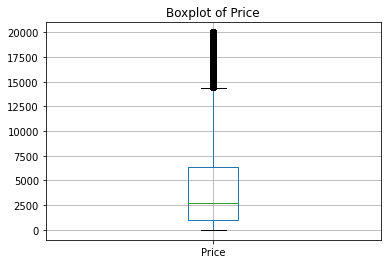

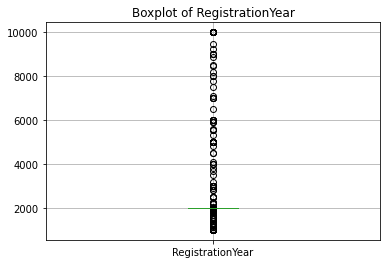

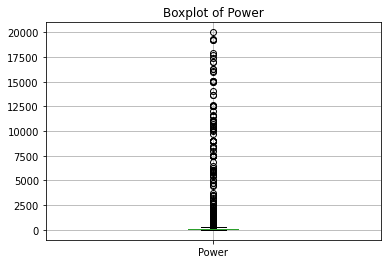

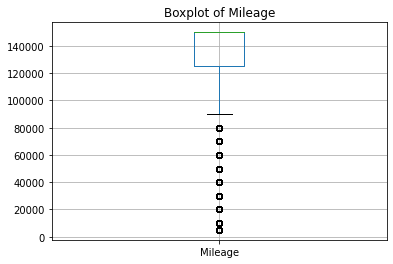

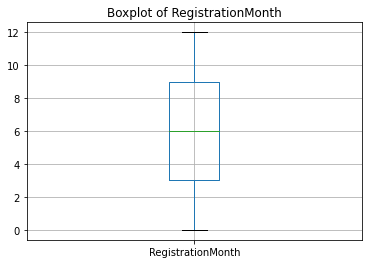

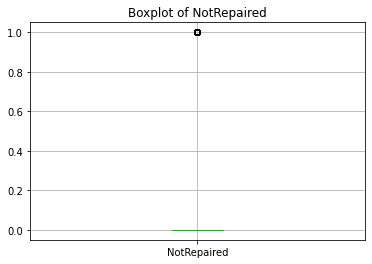

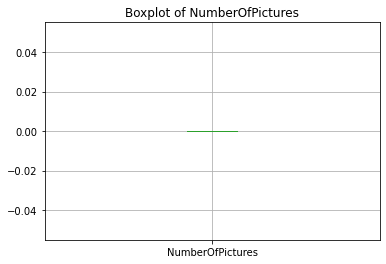

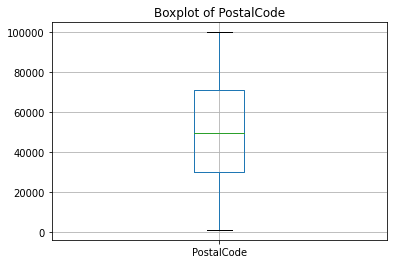

In [24]:
# Select numeric columns only
numeric_columns = data.select_dtypes(include='number')

# Create a boxplot for each numeric column
for column in numeric_columns.columns:
    plt.figure()
    data.boxplot(column=column)
    plt.title(f"Boxplot of {column}")
    plt.show()

In [25]:
numeric_columns.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NotRepaired,NumberOfPictures,PostalCode
count,354369.000000,354369.000000,354369.000000,354369.000000,354369.000000,283215.000000,354369.0,354369.000000
mean,4416.656776,2004.234448,110.094337,128211.172535,5.714645,0.127303,0.0,50508.689087
std,4514.158514,90.227958,189.850405,37905.341530,3.726421,0.333312,0.0,25783.096248
min,0.000000,1000.000000,0.000000,5000.000000,0.000000,0.000000,0.0,1067.000000
25%,1050.000000,1999.000000,69.000000,125000.000000,3.000000,0.000000,0.0,30165.000000
50%,2700.000000,2003.000000,105.000000,150000.000000,6.000000,0.000000,0.0,49413.000000
75%,6400.000000,2008.000000,143.000000,150000.000000,9.000000,0.000000,0.0,71083.000000
max,20000.000000,9999.000000,20000.000000,150000.000000,12.000000,1.000000,0.0,99998.000000


In [26]:
numeric_columns['RegistrationYear'].unique()

array([1993, 2011, 2004, 2001, 2008, 1995, 1980, 2014, 1998, 2005, 1910,
       2016, 2007, 2009, 2002, 2018, 1997, 1990, 2017, 1981, 2003, 1994,
       1991, 1984, 2006, 1999, 2012, 2010, 2000, 1992, 2013, 1996, 1985,
       1989, 2015, 1982, 1976, 1983, 1973, 1111, 1969, 1971, 1987, 1986,
       1988, 1970, 1965, 1945, 1925, 1974, 1979, 1955, 1978, 1972, 1968,
       1977, 1961, 1960, 1966, 1975, 1963, 1964, 5000, 1954, 1958, 1967,
       1959, 9999, 1956, 3200, 1000, 1941, 8888, 1500, 2200, 4100, 1962,
       1929, 1957, 1940, 3000, 2066, 1949, 2019, 1937, 1951, 1800, 1953,
       1234, 8000, 5300, 9000, 2900, 6000, 5900, 5911, 1933, 1400, 1950,
       4000, 1948, 1952, 1200, 8500, 1932, 1255, 3700, 3800, 4800, 1942,
       7000, 1935, 1936, 6500, 1923, 2290, 2500, 1930, 1001, 9450, 1944,
       1943, 1934, 1938, 1688, 2800, 1253, 1928, 1919, 5555, 5600, 1600,
       2222, 1039, 9996, 1300, 8455, 1931, 1915, 4500, 1920, 1602, 7800,
       9229, 1947, 1927, 7100, 8200, 1946, 7500, 35

In [27]:
#Cambiamos los valores que surpasen 2023 o esten debajo de 1900 para valores ausentes

column_name = 'RegistrationYear'
median = data[column_name].median()

for i in range(len(data)):
    if data.loc[i, column_name] > 2023 or data.loc[i, column_name] < 1900:
        data.loc[i, column_name] = median

In [28]:
#Seleccionamos las variables numericas para aplicar el z-score
numeric_columns = ['Price', 'Power', 'Mileage', 'NotRepaired']

#Calculamos z-scores para las columnas numericas
z_scores = zscore(data[numeric_columns])

#Ponemos el umbral
threshold = 3

#Identificamos los valores atipicos
outlier_indices = np.where(np.abs(z_scores) > threshold)

outlier_indices = [index for sublist in outlier_indices for index in sublist]

#Removemos los valores atipicos
new_data = data.drop(outlier_indices)

#Imprimimos el numero de valores atipicos y nuestro nuevo dataset
print("Valores atipicos removidos:", len(outlier_indices))
print("Tamaño del dataset sin valores atipicos:", new_data.shape)

Valores atipicos removidos: 26924
Tamaño del dataset sin valores atipicos: (341146, 16)


In [29]:
#Especificamos los porcentiles para los valores atipicos
lower_percentile = 0.05
upper_percentile = 0.76

#Eliminamos los valores atipicos
new_data['Price'] = mstats.winsorize(new_data['Price'], limits=(lower_percentile/100, upper_percentile/100))
new_data['Power'] = mstats.winsorize(new_data['Power'], limits=(lower_percentile/100, upper_percentile/100))

In [30]:
new_data.describe()

,Price,RegistrationYear,Power,Mileage,RegistrationMonth,NotRepaired,NumberOfPictures,PostalCode
count,341146.000000,341146.000000,341146.000000,341146.000000,341146.000000,274145.000000,341146.0,341146.000000
mean,4201.897742,2003.059124,105.871870,131526.032842,5.749831,0.128355,0.0,50525.987058
std,4128.863085,7.197062,60.687694,33048.472712,3.711370,0.334486,0.0,25778.905125
min,0.000000,1910.000000,0.000000,20000.000000,0.000000,0.000000,0.0,1067.000000
25%,1099.000000,1999.000000,69.000000,125000.000000,3.000000,0.000000,0.0,30165.000000
50%,2699.000000,2003.000000,103.000000,150000.000000,6.000000,0.000000,0.0,49424.000000
75%,6000.000000,2007.000000,140.000000,150000.000000,9.000000,0.000000,0.0,71088.000000
max,16999.000000,2019.000000,305.000000,150000.000000,12.000000,1.000000,0.0,99998.000000


In [31]:
percentile_75 = np.percentile(new_data['Price'], 75)

#Vemos cuantos datos pasan el percentil del 75
count = np.sum(new_data['Price'] > percentile_75)

print("Number of data points surpassing the 75th percentile:", count)

Number of data points surpassing the 75th percentile: 84988


In [32]:
percentile_25 = np.percentile(new_data['Mileage'], 25)

#Vemos cuantos datos estan debaje de el percentil del 25
count_power = np.sum(new_data['Mileage'] < percentile_25)

print("Number of data points surpassing the 75th percentile:", count_power)

Number of data points surpassing the 75th percentile: 68698


In [33]:
new_data.query('Price == 0')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
7,21/03/2016 18:54,0,sedan,1980.0,manual,50,other,40000,7,petrol,volkswagen,0.0,21/03/2016 00:00,0,19348,25/03/2016 16:47
40,26/03/2016 22:06,0,NaN,1990.0,NaN,0,corsa,150000,1,petrol,opel,NaN,26/03/2016 00:00,0,56412,27/03/2016 17:43
152,11/03/2016 18:55,0,bus,2004.0,manual,101,meriva,150000,10,lpg,opel,1.0,11/03/2016 00:00,0,27432,12/03/2016 23:47
231,16/03/2016 22:06,0,wagon,2001.0,manual,115,mondeo,150000,0,NaN,ford,NaN,16/03/2016 00:00,0,57627,26/03/2016 11:17
334,06/03/2016 10:06,0,NaN,2005.0,NaN,0,polo,150000,0,petrol,volkswagen,NaN,06/03/2016 00:00,0,35392,07/03/2016 19:12
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354205,09/03/2016 15:56,0,NaN,2000.0,manual,65,corsa,150000,0,NaN,opel,1.0,09/03/2016 00:00,0,23758,30/03/2016 11:16
354238,20/03/2016 14:55,0,small,2002.0,manual,60,fiesta,150000,3,petrol,ford,NaN,20/03/2016 00:00,0,33659,06/04/2016 18:45
354248,24/03/2016 13:48,0,small,1999.0,manual,53,swift,150000,3,petrol,suzuki,NaN,24/03/2016 00:00,0,42329,07/04/2016 05:17
354277,10/03/2016 22:55,0,small,1999.0,manual,37,arosa,150000,7,petrol,seat,1.0,10/03/2016 00:00,0,22559,12/03/2016 23:46


In [34]:
new_data.query('Power == 0')

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
32,15/03/2016 20:59,245,sedan,1994.0,NaN,0,golf,150000,2,petrol,volkswagen,0.0,15/03/2016 00:00,0,44145,17/03/2016 18:17
37,28/03/2016 17:50,1500,NaN,2016.0,NaN,0,kangoo,150000,1,gasoline,renault,0.0,28/03/2016 00:00,0,46483,30/03/2016 09:18
40,26/03/2016 22:06,0,NaN,1990.0,NaN,0,corsa,150000,1,petrol,opel,NaN,26/03/2016 00:00,0,56412,27/03/2016 17:43
54,17/03/2016 07:56,4700,wagon,2005.0,manual,0,signum,150000,0,NaN,opel,0.0,17/03/2016 00:00,0,88433,04/04/2016 04:17
55,26/03/2016 10:39,550,wagon,1999.0,manual,0,astra,150000,8,gasoline,opel,1.0,26/03/2016 00:00,0,56759,01/04/2016 23:17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
354338,31/03/2016 19:52,180,NaN,1995.0,NaN,0,NaN,125000,3,petrol,opel,NaN,31/03/2016 00:00,0,41470,06/04/2016 14:18
354346,07/03/2016 17:06,2600,NaN,2005.0,auto,0,c_klasse,150000,9,NaN,mercedes_benz,NaN,07/03/2016 00:00,0,61169,08/03/2016 21:28
354363,27/03/2016 20:36,1150,bus,2000.0,manual,0,zafira,150000,3,petrol,opel,0.0,27/03/2016 00:00,0,26624,29/03/2016 10:17
354364,21/03/2016 09:50,0,NaN,2005.0,manual,0,colt,150000,7,petrol,mitsubishi,1.0,21/03/2016 00:00,0,2694,21/03/2016 10:42


<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Buena eliminacion de outliers! importante sacar outlier en base a la distribucion.
</div>

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Sin embargo revisa si por ahi no te esta quedando una variable con valores que no tienen sentido a pesar de esta eliminacion de outlier !. **Respuesta:** revisa si el precio y potencia de 0 tiene sentido ! </div>

<div class="alert alert-block alert-info">
<b>Hecho! Tenias razon, ya lo procese mas abajo.</b> <a class="tocSkip"></a>
</div>

In [36]:
new_data.isna().sum()

DateCrawled              0
Price                    0
VehicleType          34661
RegistrationYear         0
Gearbox              17448
Power                    0
Model                17794
Mileage                  0
RegistrationMonth        0
FuelType             30109
Brand                    0
NotRepaired          67001
DateCreated              0
NumberOfPictures         0
PostalCode               0
LastSeen                 0
dtype: int64

In [37]:
#A las variables categoricas que no son numericas les vamos a cambiar los datos ausentes a 'unkown'
new_data['VehicleType'] = new_data['VehicleType'].fillna('unknown')
new_data['Gearbox'] = new_data['Gearbox'].fillna('unknown')
new_data['Model'] = new_data['Model'].fillna('unknown')
new_data['FuelType'] = new_data['FuelType'].fillna('unknown')

#A la variable 'NotRepaired' vamos a llenar los valores ausentes con un valor numerico (2)
new_data['NotRepaired'] = new_data['NotRepaired'].fillna(2)

#Aplicamos un reset_index()
new_data = new_data.reset_index()

In [38]:
new_data['Price'] = new_data['Price'].replace(0, np.nan)
new_data['Power'] = new_data['Power'].replace(0, np.nan)

price_median = new_data.groupby('Mileage')['Price'].median()
power_median = new_data.groupby('VehicleType')['Power'].median()

def fill_power(row):
    row_power = row['Power']
    row_vehicle_type = row['VehicleType']
    if pd.isna(row_power):
        return power_median[row_vehicle_type]
    else:
        return row_power
    
def fill_price(row):
    row_price = row['Price']
    row_mileage = row['Mileage']
    if pd.isna(row_price):
        return price_median[row_mileage]
    else:
        return row_price
    
new_data['Price'] = new_data.apply(fill_price, axis=1)
new_data['Power'] = new_data.apply(fill_power, axis=1)

In [40]:
new_data.query('Price == 0 | Power == 0')

,index,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen


In [41]:
new_data = new_data.drop(['index'], axis=1)
new_data

,DateCrawled,Price,VehicleType,RegistrationYear,Gearbox,Power,Model,Mileage,RegistrationMonth,FuelType,Brand,NotRepaired,DateCreated,NumberOfPictures,PostalCode,LastSeen
0,17/03/2016 16:54,1500.0,small,2001.0,manual,75.0,golf,150000,6,petrol,volkswagen,0.0,17/03/2016 00:00,0,91074,17/03/2016 17:40
1,31/03/2016 17:25,3600.0,small,2008.0,manual,69.0,fabia,90000,7,gasoline,skoda,0.0,31/03/2016 00:00,0,60437,06/04/2016 10:17
2,04/04/2016 17:36,650.0,sedan,1995.0,manual,102.0,3er,150000,10,petrol,bmw,1.0,04/04/2016 00:00,0,33775,06/04/2016 19:17
3,01/04/2016 20:48,2200.0,convertible,2004.0,manual,109.0,2_reihe,150000,8,petrol,peugeot,0.0,01/04/2016 00:00,0,67112,05/04/2016 18:18
4,21/03/2016 18:54,8500.0,sedan,1980.0,manual,50.0,other,40000,7,petrol,volkswagen,0.0,21/03/2016 00:00,0,19348,25/03/2016 16:47
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341141,21/03/2016 09:50,2100.0,unknown,2005.0,manual,101.0,colt,150000,7,petrol,mitsubishi,1.0,21/03/2016 00:00,0,2694,21/03/2016 10:42
341142,14/03/2016 17:48,2200.0,unknown,2005.0,unknown,101.0,unknown,20000,1,unknown,sonstige_autos,2.0,14/03/2016 00:00,0,39576,06/04/2016 00:46
341143,05/03/2016 19:56,1199.0,convertible,2000.0,auto,101.0,fortwo,125000,3,petrol,smart,0.0,05/03/2016 00:00,0,26135,11/03/2016 18:17
341144,19/03/2016 18:57,9200.0,bus,1996.0,manual,102.0,transporter,150000,3,gasoline,volkswagen,0.0,19/03/2016 00:00,0,87439,07/04/2016 07:15


En esta etapa hay varias cosas que considerar. Tenemos los datos que de por si tienen valores duplicados, pero no es siginificativo y si lo fuera, puede que los duplicados tengan algun significado por lo que no se decide actuar sobre estos. Tambien logramos ver sobre las columnas 'RegistrationMonth' y 'NumberOfPictures', en las cuales, respectivamente, una tiene 13 meses (de 0 a 12) y la otra tiene un valor unico (0). En cambio, con los valores ausentes y/o atipicos, si hay que tratarlos. Hicimos primero un umbral para usar el zscore y tratar los valores atipicos en las variables numericas que denotaban cierto imbalance. Para facilitar el uso de modelos de ML, cambiamos los valores de la columna 'NotRepaired' a valores binarios, siendo yes (1), no (0), y NaN (3).

Luego, nos concentramos en los valores ausentes, pues aunque no son una enorme proporcion, tratarlos de manera equivocada puede afectar la investigacion por el motivo que no estan distribuidos equitativamente. Se pueden considerar varias maneras de tratarlos, como si son variables categoricas hacer una categoria especifica para ellos ('unknown'), y si son numericas imputar mediante la mediana o media. Podemos ver tambien un describe de los datos para darnos una imagen mas clara sobre el dataset despues de imputar y eliminar valores ausentes. Vemos que hay una diferencia entre los valores del 25% y mediana (50%), pero sacamos la cantidad de datos que son menos o mayores que los percentiles de 25 o 75 a las columnas que nos preocupan y vemos que hay bastantes datos, por lo que no se consideraria como tal valores atipicos, debido a la cantidad de datos que existen de este tipo.

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Si bien eliminar datos duplicados es valido. Es mucho mejor remplazar los valores no llenos si el registro no tiene muchos na. Esto pues que podrias perder informacion valiosa. Por ejemplo estes perdiendo un modelo de carro en especifico de la informacion. Te recomiendo generar un nuevo valor para estos casos como 'desconocido' y si el valor es numerico si lo puedes remplazar con media, mediana, etc. **HECHO**
</div>

<div class="alert alert-block alert-info">
<b>Hecho!</b> <a class="tocSkip"></a>
</div>

## Entrenamiento del modelo 

In [89]:
#Eliminamos las columnas que no son relevantes para los modelos
new_data = new_data.drop(['DateCrawled', 'DateCreated', 'NumberOfPictures', 'PostalCode', 'LastSeen', 'RegistrationYear', 'RegistrationMonth'], axis=1)

In [90]:
new_data.isna().sum()

Price          0
VehicleType    0
Gearbox        0
Power          0
Model          0
Mileage        0
FuelType       0
Brand          0
NotRepaired    0
dtype: int64

In [91]:
#Codificamos con OHE para la regresion lineal y XGBoost
encoder = OneHotEncoder(sparse=False, drop='first')

#Escogemos las columnas categoricas de interes
columns_of_interest = ['VehicleType', 'Gearbox', 'Model', 'FuelType', 'Brand']
categorical_data = new_data[columns_of_interest]

#Data codificada transformada
ohe_data = encoder.fit_transform(categorical_data)

#Creamos un dataset con la data codificada y columnas
ohe_df = pd.DataFrame(ohe_data, columns=encoder.get_feature_names(columns_of_interest))

#Juntamos con el dataframe original sin valores ausentes
data_encoded = pd.concat([new_data.drop(columns=columns_of_interest), ohe_df], axis=1)

In [92]:
del ohe_data, ohe_df, data

In [93]:
#Creamos el OrdinalEncoder
ordinal = OrdinalEncoder()

#Codificamos las columnas de interes con OrdinalEncoder
new_data[columns_of_interest] = ordinal.fit_transform(new_data[columns_of_interest])

new_data

,Price,VehicleType,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
0,1500,5.0,1.0,75,116.0,150000,6.0,38.0,0.0
1,3600,5.0,1.0,69,101.0,90000,2.0,31.0,0.0
2,650,4.0,1.0,102,11.0,150000,6.0,2.0,1.0
3,2200,1.0,1.0,109,8.0,150000,6.0,25.0,0.0
4,0,4.0,1.0,50,166.0,40000,6.0,38.0,0.0
...,...,...,...,...,...,...,...,...,...
341141,0,7.0,1.0,0,78.0,150000,6.0,22.0,1.0
341142,2200,7.0,2.0,0,228.0,20000,7.0,33.0,2.0
341143,1199,1.0,0.0,101,106.0,125000,6.0,32.0,0.0
341144,9200,0.0,1.0,102,224.0,150000,2.0,38.0,0.0


In [94]:
new_data.describe()

,Price,VehicleType,Gearbox,Power,Model,Mileage,FuelType,Brand,NotRepaired
count,341146.000000,341146.000000,341146.000000,341146.000000,341146.000000,341146.000000,341146.000000,341146.000000,341146.000000
mean,4201.897742,4.749547,0.867456,105.871870,115.135649,131526.032842,4.933152,20.914359,0.495946
std,4128.863085,2.384859,0.466120,60.687694,73.664703,33048.472712,1.877867,13.282859,0.801739
min,0.000000,0.000000,0.000000,0.000000,0.000000,20000.000000,0.000000,0.000000,0.000000
25%,1099.000000,4.000000,1.000000,69.000000,42.000000,125000.000000,2.000000,10.000000,0.000000
50%,2699.000000,5.000000,1.000000,103.000000,116.000000,150000.000000,6.000000,24.000000,0.000000
75%,6000.000000,7.000000,1.000000,140.000000,170.000000,150000.000000,6.000000,34.000000,1.000000
max,16999.000000,8.000000,2.000000,305.000000,250.000000,150000.000000,7.000000,39.000000,2.000000


In [95]:
new_data.query('Mileage != 150000').count()

Price          104540
VehicleType    104540
Gearbox        104540
Power          104540
Model          104540
Mileage        104540
FuelType       104540
Brand          104540
NotRepaired    104540
dtype: int64

In [96]:
#Visualicemos
data_encoded

,Price,Power,Mileage,NotRepaired,VehicleType_convertible,VehicleType_coupe,VehicleType_other,VehicleType_sedan,VehicleType_small,VehicleType_suv,...,Brand_seat,Brand_skoda,Brand_smart,Brand_sonstige_autos,Brand_subaru,Brand_suzuki,Brand_toyota,Brand_trabant,Brand_volkswagen,Brand_volvo
0,1500,75,150000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
1,3600,69,90000,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,650,102,150000,1.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,2200,109,150000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0,50,40000,0.0,0.0,0.0,0.0,1.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
341141,0,0,150000,1.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
341142,2200,0,20000,2.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
341143,1199,101,125000,0.0,1.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
341144,9200,102,150000,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0


<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Revisa si no debes eliminar otra columna que tenga un valor unico por registro. Con esta variable estarias ocasionando overfitting sobre la data. **HECHO**. La variable era index, ya no la veo, super ! 
</div>

<div class="alert alert-block alert-info">
<b>Podria ser la variable Mileage, pero tiene valores diferentes a 15000, como revisamos en la parte anterior, aunque en su mayoria son 15000. Igual voy a tratarlo como categorico debido a sus pocos valores unicos.</b> <a class="tocSkip"></a>
</div>

In [44]:
!free

              total        used        free      shared  buff/cache   available
Mem:       16007204    10974688     1204604      128176     3827912     4540980
Swap:             0           0           0


In [45]:
data_encoded.isna().sum().sum()

0

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Excelente procesamiento de datos
</div>

In [46]:
#Sacamos el objetivo y caracteristicas del dataframe codificado
features_encoded = data_encoded.drop(['Price'], axis=1)
target_encoded = data_encoded['Price']

X_train_val_encoded, X_test_encoded, y_train_val_encoded, y_test_encoded = train_test_split(features_encoded, target_encoded, test_size=0.2, random_state=12345)

X_train_encoded, X_val_encoded, y_train_encoded, y_val_encoded = train_test_split(X_train_val_encoded, y_train_val_encoded, test_size=0.2, random_state=12345)

In [47]:
#Sacamos las caracteristicas y objetivo del dataset sin valores ausentes
features = new_data.drop(['Price'], axis=1)
target = new_data['Price']

X_train, X_test, y_train, y_test = train_test_split(features, target, test_size=0.2, random_state=12345)

X_train_final, X_val, y_train_final, y_val = train_test_split(X_train, y_train, test_size=0.2, random_state=12345)

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

En general una buena separacion de conjuntos es train: 60-80, test:20-10% validation:20-10%. Eso depende mucho de la cantidad de datos que tengas. Te recomiendo separar ambos grupos con estas proporciones. Recuerda si quieres tener lso valores por ejemplo: train:80%, test:10% y validation:10%. Primero separas con test size=0.2 y luego, de ese 20, los separas por mitad con test_size=0.5. En tu caso la separacion esta de la siguiente manera: train:64%, test:20%, validation:16%.
</div>

In [48]:
del features_encoded, target_encoded, features, target, data_encoded

In [49]:
del X_train, y_train, X_train_val_encoded, y_train_val_encoded

In [50]:
!free

              total        used        free      shared  buff/cache   available
Mem:       16007204    11814076     1679888      128176     2513240     3697880
Swap:             0           0           0


Etiquetamos los datos con dos tipos de codificadores, OneHotEncoder y OrdinalEncoder. OneHotEncoder nos sirve para los modelos de regresion lineal  y xgboost (LinealRegression, XGBoost), mientras que OrdinalEncoder sirve para los arboles y demas modelos (DecisionTreeRegressor, RandomForestRegressor, LightGBM, CatBoostRegressor). Tambien imprimimos la cantidad de memoria que nos queda para nuestro entrenamiento y analisis de modelos.

<div class="alert alert-block alert-danger">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Recuerda la separacion es en tres conjuntos train, validation y test! Veo que solo tienes dos conjuntos train y test. Recuerda tambien que el conjunto de validacion es para escoger la mejor parametrizacion y el test se evalua el modelo sobre data no vista para dar un indicio como funcionaria en produccion el modelo. **HECHO**
</div>

<div class="alert alert-block alert-info">
<b>Hecho!</b> <a class="tocSkip"></a>
</div>

### XGBoost

Por motivos computacionales y de memoria, primero se realizara el XGBoost. Luego seguiremos con los modelos base y potenciacion de gradiente.

In [51]:
def xgb_calc():
    #Creamos un modelo de XGBoost
    xgb_reg = xgb.XGBRegressor()

    #Definimos los hiperparametros para usar
    param_grid_xgb = {
        'max_depth': [2, 4],  #Maxima profundidad
        'learning_rate': [0.1, 0.01],  #Ritmo de aprendizaje
        'n_estimators': [10, 20]  #Numero de iteraciones
    }

    #Creamos el GridSearchCV
    grid_search_xgb = GridSearchCV(estimator=xgb_reg, param_grid=param_grid_xgb, cv=5, scoring='neg_root_mean_squared_error')

    #Entrenar el GridSearchCV con el conjunto de entrenamiento
    grid_search_xgb.fit(X_train_encoded, y_train_encoded)

    #Obtener el mejor modelo
    best_model_xgb = grid_search_xgb.best_estimator_

    #Realizar predicciones en el conjunto de validación
    y_pred_val_xgb = best_model_xgb.predict(X_val_encoded)

    #Calcular el error cuadrático medio (RMSE) en el conjunto de validación
    rmse_val_xgb = mean_squared_error(y_val_encoded, y_pred_val_xgb, squared=False)
    print("RMSE de validación (XGBoost):", rmse_val_xgb)

    #Realizar predicciones en el conjunto de prueba
    y_pred_test_xgb = best_model_xgb.predict(X_test_encoded)

    #Calcular el error cuadrático medio (RMSE) en el conjunto de prueba
    rmse_test_xgb = mean_squared_error(y_test_encoded, y_pred_test_xgb, squared=False)
    print("RMSE de prueba (XGBoost):", rmse_test_xgb)
    return grid_search_xgb, rmse_val_xgb, rmse_test_xgb

grid_search_xgb_, rmse_val_xgb_, rmse_test_xgb_ = xgb_calc()

RMSE de validación (XGBoost): 2723.320256119982
RMSE de prueba (XGBoost): 2726.6179171516255


### Linear Regression

In [52]:
def lr_calc():
    #Creamos un modelo de regresion lineal
    lr = LinearRegression()

    #Definimos los hiperparametros para el GridSearchCV
    param_grid_lr = {
        'fit_intercept': [True, False],
        'normalize': [True, False],
        'copy_X': [True, False]
    }

    #Aplicamos el GridSearchCV
    grid_search_lr = GridSearchCV(lr, param_grid_lr, cv=5, scoring='neg_root_mean_squared_error')

    #Entrenamos el GridSearchCV con el conjunto de entrenamiento
    grid_search_lr.fit(X_train_encoded, y_train_encoded)

    #Obtenemos el mejor modelo
    best_model_lr = grid_search_lr.best_estimator_

    #Realizamos predicciones en el conjunto de validación
    y_pred_val_lr = best_model_lr.predict(X_val_encoded)

    #Calculamos el error cuadrático medio (RMSE) en el conjunto de validación
    rmse_val_lr = mean_squared_error(y_val_encoded, y_pred_val_lr, squared=False)
    print("RMSE de validación (Regresión Lineal):", rmse_val_lr)

    #Realizamos predicciones en el conjunto de prueba
    y_pred_test_lr = best_model_lr.predict(X_test_encoded)

    #Calculamos el error cuadrático medio (RMSE) en el conjunto de prueba
    rmse_test_lr = mean_squared_error(y_test_encoded, y_pred_test_lr, squared=False)
    print("RMSE de prueba (Regresión Lineal):", rmse_test_lr)
    return grid_search_lr, rmse_val_lr, rmse_test_lr

grid_search_lr_, rmse_val_lr_, rmse_test_lr_ = lr_calc()

RMSE de validación (Regresión Lineal): 2688.681641098625
RMSE de prueba (Regresión Lineal): 2686.0102401013946


### DecisionTreeRegressor

In [53]:
def dt_calc():   
    #Creamos un modelo de DecisionTreeRegressor
    dt = DecisionTreeRegressor()

    #Definimos los hiperparametros para probar
    param_grid_dt = {
        'max_depth': [None, 5, 10],  # Maximum depth of the tree
        'min_samples_split': [2, 5, 10],  # Minimum number of samples required to split an internal node
        'min_samples_leaf': [1, 2, 4]  # Minimum number of samples required to be at a leaf node
    }

    #Creamos el GridSearchCV
    grid_search_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='neg_root_mean_squared_error')

    #Entrenamos el GridSearchCV con el conjunto de entrenamiento final
    grid_search_dt.fit(X_train_final, y_train_final)

    #Obtenemos el mejor modelo
    best_model_dt = grid_search_dt.best_estimator_

    #Realizamos predicciones en el conjunto de validación
    y_pred_val_dt = best_model_dt.predict(X_val)

    #Calculamos el error cuadrático medio (RMSE) en el conjunto de validación
    rmse_val_dt = mean_squared_error(y_val, y_pred_val_dt, squared=False)
    print("RMSE de validación (Árbol de Decisión):", rmse_val_dt)

    #Realizamos predicciones en el conjunto de prueba
    y_pred_test_dt = best_model_dt.predict(X_test)

    #Calculamos el error cuadrático medio (RMSE) en el conjunto de prueba
    rmse_test_dt = mean_squared_error(y_test, y_pred_test_dt, squared=False)
    print("RMSE de prueba (Árbol de Decisión):", rmse_test_dt)
    return grid_search_dt, rmse_val_dt, rmse_test_dt

grid_search_dt_, rmse_val_dt_, rmse_test_dt_ = dt_calc()

RMSE de validación (Árbol de Decisión): 2220.687723443033
RMSE de prueba (Árbol de Decisión): 2225.9483422864123


### Forest Regressor

In [54]:
def rf_calc():
    #Creamos un modelo de RandomForestRegressor
    rf = RandomForestRegressor(random_state=12345)

    #Definimos los hiperparametros para probar
    param_grid_rf = {
        'n_estimators': [10, 20],  #Numero de arboles a probar
        'max_depth': [None, 5, 10],  #Maxima profundidad a probar
        'min_samples_split': [2],  #Numero de samples en las que separar
        'min_samples_leaf': [1]  #Numero minimo de muestras necesarias en un nodo hoja.  
         #Por temas de minimizacion de espacio, no se usaran los siguientes hiperparametros (max_features)
    }

    #Creamos el GridSearchCV de RandomForestRegressor
    grid_search_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='neg_root_mean_squared_error')

    #Entrenamos el GridSearchCV con el conjunto de entrenamiento final
    grid_search_rf.fit(X_train_final, y_train_final)

    #Obtenemos el mejor modelo
    best_model_rf = grid_search_rf.best_estimator_

    #Realizamos predicciones en el conjunto de validación
    y_pred_val_rf = best_model_rf.predict(X_val)

    #Calculamos el error cuadrático medio (RMSE) en el conjunto de validación
    rmse_val_rf = mean_squared_error(y_val, y_pred_val_rf, squared=False)
    print("RMSE de validación (Random Forest):", rmse_val_rf)

    #Realizamos predicciones en el conjunto de prueba
    y_pred_test_rf = best_model_rf.predict(X_test)

    #Calculamos el error cuadrático medio (RMSE) en el conjunto de prueba
    rmse_test_rf = mean_squared_error(y_test, y_pred_test_rf, squared=False)
    print("RMSE de prueba (Random Forest):", rmse_test_rf)
    return grid_search_rf, rmse_val_rf, rmse_test_rf

grid_search_rf_, rmse_val_rf_, rmse_test_rf_ = rf_calc()

RMSE de validación (Random Forest): 2097.544634012833
RMSE de prueba (Random Forest): 2092.4435140405203


### LightGBM

In [60]:
def lgb_calc():
    #Creamos el modelo de LightGBM
    lgb_reg = lgb.LGBMRegressor()

    #Definimos los hiperparametros para probar
    param_grid_lgb = {
        'num_leaves': [31, 50, 100],  #Maximo de hojas por arbol
        'learning_rate': [0.05, 0.1, 0.2],  #Ritmo de aprendizaje
        'n_estimators': [10, 20, 30]  #Numero de iteraciones
    }

    #Creamos el GridSearchCV
    grid_search_lgb = GridSearchCV(estimator=lgb_reg, param_grid=param_grid_lgb, cv=5, scoring='neg_root_mean_squared_error')

    #Entrenamos el GridSearchCV con el conjunto de entrenamiento final
    grid_search_lgb.fit(X_train_final, y_train_final)

    #Obtenemos el mejor modelo
    best_model_lgb = grid_search_lgb.best_estimator_

    #Realizamos predicciones en el conjunto de validación
    y_pred_val_lgb = best_model_lgb.predict(X_val)

    #Calculamos el error cuadrático medio (RMSE) en el conjunto de validación
    rmse_val_lgb = mean_squared_error(y_val, y_pred_val_lgb, squared=False)
    print("RMSE de validación (LightGBM):", rmse_val_lgb)

    #Realizamos predicciones en el conjunto de prueba
    y_pred_test_lgb = best_model_lgb.predict(X_test)

    #Calculamos el error cuadrático medio (RMSE) en el conjunto de prueba
    rmse_test_lgb = mean_squared_error(y_test, y_pred_test_lgb, squared=False)
    print("RMSE de prueba (LightGBM):", rmse_test_lgb)
    return grid_search_lgb, rmse_val_lgb, rmse_test_lgb

grid_search_lgb_, rmse_val_lgb_, rmse_test_lgb_ = lgb_calc()

RMSE de validación (LightGBM): 2177.0009138090104
RMSE de prueba (LightGBM): 2176.0194244737067


### CatBoost

In [56]:
def cb_calc():
    #Definimos los hiperparametros para usar
    catboost_param_grid = {
        'depth': [4, 7], #Profundidad
        'learning_rate': [0.1, 0.01], #Ritmo de aprendizaje
        'iterations': [10, 20] #Iteraciones
    }

    #Creamos el modelo de CatBoostRegressor
    catboost_model = CatBoostRegressor()

    #Creamos el GridSearchCV
    catboost_grid_search = GridSearchCV(catboost_model, catboost_param_grid, cv=5, scoring='neg_root_mean_squared_error')

    #Entrenamos el GridSearchCV con el conjunto de entrenamiento final
    catboost_grid_search.fit(X_train_final, y_train_final)

    #Obtenemos el mejor modelo
    best_model_catboost = catboost_grid_search.best_estimator_

    #Realizamos predicciones en el conjunto de validación
    y_pred_val_catboost = best_model_catboost.predict(X_val)

    #Calculamos el error cuadrático medio (RMSE) en el conjunto de validación
    rmse_val_catboost = mean_squared_error(y_val, y_pred_val_catboost, squared=False)
    print("RMSE de validación (CatBoost):", rmse_val_catboost)

    #Realizamos predicciones en el conjunto de prueba
    y_pred_test_catboost = best_model_catboost.predict(X_test)

    #Calculamos el error cuadrático medio (RMSE) en el conjunto de prueba
    rmse_test_catboost = mean_squared_error(y_test, y_pred_test_catboost, squared=False)
    print("RMSE de prueba (CatBoost):", rmse_test_catboost)
    return catboost_grid_search, rmse_val_catboost, rmse_test_catboost

catboost_grid_search_, rmse_val_catboost_, rmse_test_catboost_ = cb_calc()

0:	learn: 3943.4957074	total: 78.1ms	remaining: 702ms
1:	learn: 3786.6835655	total: 107ms	remaining: 429ms
2:	learn: 3645.9488990	total: 135ms	remaining: 316ms
3:	learn: 3526.8380196	total: 164ms	remaining: 246ms
4:	learn: 3417.6470031	total: 192ms	remaining: 192ms
5:	learn: 3323.0839171	total: 219ms	remaining: 146ms
6:	learn: 3238.7609201	total: 248ms	remaining: 106ms
7:	learn: 3165.3542233	total: 280ms	remaining: 70ms
8:	learn: 3099.6355350	total: 309ms	remaining: 34.3ms
9:	learn: 3045.1815789	total: 340ms	remaining: 0us
0:	learn: 3952.3249213	total: 28.2ms	remaining: 253ms
1:	learn: 3795.1230294	total: 59.4ms	remaining: 238ms
2:	learn: 3653.1782590	total: 94.6ms	remaining: 221ms
3:	learn: 3530.3048812	total: 131ms	remaining: 196ms
4:	learn: 3417.4408016	total: 168ms	remaining: 168ms
5:	learn: 3321.4626336	total: 198ms	remaining: 132ms
6:	learn: 3240.9112390	total: 226ms	remaining: 96.8ms
7:	learn: 3166.2851219	total: 254ms	remaining: 63.5ms
8:	learn: 3101.7051816	total: 280ms	remain

14:	learn: 2858.9430187	total: 451ms	remaining: 150ms
15:	learn: 2834.1956460	total: 485ms	remaining: 121ms
16:	learn: 2813.4995107	total: 513ms	remaining: 90.6ms
17:	learn: 2793.9299002	total: 542ms	remaining: 60.2ms
18:	learn: 2775.6419978	total: 569ms	remaining: 30ms
19:	learn: 2759.9281109	total: 597ms	remaining: 0us
0:	learn: 3959.0151891	total: 30ms	remaining: 569ms
1:	learn: 3801.8663382	total: 58.5ms	remaining: 526ms
2:	learn: 3659.7250706	total: 88.9ms	remaining: 504ms
3:	learn: 3537.5414319	total: 116ms	remaining: 464ms
4:	learn: 3424.9100018	total: 146ms	remaining: 438ms
5:	learn: 3328.8069161	total: 179ms	remaining: 418ms
6:	learn: 3246.4180191	total: 212ms	remaining: 393ms
7:	learn: 3170.9338015	total: 247ms	remaining: 371ms
8:	learn: 3110.1315128	total: 282ms	remaining: 344ms
9:	learn: 3054.8532090	total: 319ms	remaining: 319ms
10:	learn: 3005.7144966	total: 360ms	remaining: 294ms
11:	learn: 2962.0281228	total: 399ms	remaining: 266ms
12:	learn: 2923.8447861	total: 435ms	r

0:	learn: 3914.6138762	total: 49.4ms	remaining: 444ms
1:	learn: 3721.2603236	total: 87.6ms	remaining: 350ms
2:	learn: 3557.6306627	total: 123ms	remaining: 287ms
3:	learn: 3419.8588296	total: 162ms	remaining: 243ms
4:	learn: 3298.2193716	total: 196ms	remaining: 196ms
5:	learn: 3192.8044614	total: 232ms	remaining: 155ms
6:	learn: 3104.6761875	total: 267ms	remaining: 115ms
7:	learn: 3029.5986255	total: 306ms	remaining: 76.6ms
8:	learn: 2965.6782886	total: 343ms	remaining: 38.1ms
9:	learn: 2908.9688523	total: 382ms	remaining: 0us
0:	learn: 3918.0698157	total: 37.8ms	remaining: 340ms
1:	learn: 3723.8067161	total: 76.6ms	remaining: 306ms
2:	learn: 3565.5839097	total: 115ms	remaining: 268ms
3:	learn: 3421.4740653	total: 153ms	remaining: 229ms
4:	learn: 3300.9598658	total: 189ms	remaining: 189ms
5:	learn: 3192.1867825	total: 227ms	remaining: 151ms
6:	learn: 3103.8320150	total: 267ms	remaining: 114ms
7:	learn: 3029.1099612	total: 307ms	remaining: 76.7ms
8:	learn: 2965.3684062	total: 346ms	remai

6:	learn: 3110.3916652	total: 270ms	remaining: 501ms
7:	learn: 3035.6198946	total: 306ms	remaining: 459ms
8:	learn: 2971.5422631	total: 351ms	remaining: 429ms
9:	learn: 2917.8954154	total: 386ms	remaining: 386ms
10:	learn: 2870.7647367	total: 427ms	remaining: 349ms
11:	learn: 2830.8180073	total: 465ms	remaining: 310ms
12:	learn: 2795.0587067	total: 501ms	remaining: 270ms
13:	learn: 2763.6669483	total: 539ms	remaining: 231ms
14:	learn: 2738.2875624	total: 575ms	remaining: 192ms
15:	learn: 2713.5436222	total: 614ms	remaining: 153ms
16:	learn: 2692.1022862	total: 653ms	remaining: 115ms
17:	learn: 2675.5019273	total: 690ms	remaining: 76.7ms
18:	learn: 2659.8106126	total: 736ms	remaining: 38.8ms
19:	learn: 2647.0013357	total: 775ms	remaining: 0us
0:	learn: 3912.5016928	total: 41.6ms	remaining: 790ms
1:	learn: 3719.5216668	total: 77.9ms	remaining: 701ms
2:	learn: 3556.2645614	total: 113ms	remaining: 642ms
3:	learn: 3416.7894778	total: 150ms	remaining: 601ms
4:	learn: 3298.1434646	total: 186m

19:	learn: 2640.7679995	total: 966ms	remaining: 0us
RMSE de validación (CatBoost): 2630.478009338656
RMSE de prueba (CatBoost): 2635.21519740363


## Análisis del modelo

#### DecisionTreeRegressor

In [59]:
%%time
print(grid_search_xgb_.best_params_)
best_xgb = xgb.XGBRegressor(**grid_search_xgb_.best_params_)
best_xgb.fit(X_train_encoded, y_train_encoded)

CPU times: user 1min, sys: 286 ms, total: 1min 1s
Wall time: 1min 1s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [65]:
%%time
print(grid_search_lr_.best_params_)
best_lr = LinearRegression(**grid_search_lr_.best_params_)
best_lr.fit(X_train_encoded, y_train_encoded)

CPU times: user 14.3 s, sys: 3.83 s, total: 18.1 s
Wall time: 18.3 s


LinearRegression()

In [71]:
%%time
print(grid_search_dt_.best_params_)
best_dt = DecisionTreeRegressor(**grid_search_dt_.best_params_)
best_dt.fit(X_train_final, y_train_final)

CPU times: user 675 ms, sys: 1.04 ms, total: 677 ms
Wall time: 675 ms


DecisionTreeRegressor(min_samples_leaf=4, min_samples_split=10)

In [68]:
%%time
print(grid_search_rf_.best_params_)
best_rf = RandomForestRegressor(**grid_search_rf_.best_params_)
best_rf.fit(X_train_final, y_train_final)

CPU times: user 10.5 s, sys: 65.1 ms, total: 10.5 s
Wall time: 10.7 s


RandomForestRegressor(n_estimators=20)

In [69]:
%%time
print(grid_search_lgb_.best_params_)
best_lgb = lgb.LGBMRegressor(**grid_search_lgb_.best_params_)
best_xgb.fit(X_train_final, y_train_final)

CPU times: user 4.2 s, sys: 22.8 ms, total: 4.22 s
Wall time: 4.17 s


XGBRegressor(base_score=0.5, booster='gbtree', colsample_bylevel=1,
             colsample_bynode=1, colsample_bytree=1, enable_categorical=False,
             gamma=0, gpu_id=-1, importance_type=None,
             interaction_constraints='', learning_rate=0.1, max_delta_step=0,
             max_depth=4, min_child_weight=1, missing=nan,
             monotone_constraints='()', n_estimators=20, n_jobs=4,
             num_parallel_tree=1, predictor='auto', random_state=0, reg_alpha=0,
             reg_lambda=1, scale_pos_weight=1, subsample=1, tree_method='exact',
             validate_parameters=1, verbosity=None)

In [70]:
%%time
print(catboost_grid_search_.best_params_)
best_cb = CatBoostRegressor(**catboost_grid_search_.best_params_)
best_cb.fit(X_train_final, y_train_final)

0:	learn: 3914.5385069	total: 48ms	remaining: 912ms
1:	learn: 3725.8606773	total: 96.2ms	remaining: 866ms
2:	learn: 3560.1099413	total: 140ms	remaining: 795ms
3:	learn: 3423.7452237	total: 188ms	remaining: 752ms
4:	learn: 3306.4207643	total: 234ms	remaining: 702ms
5:	learn: 3203.8033399	total: 278ms	remaining: 650ms
6:	learn: 3111.7096813	total: 327ms	remaining: 608ms
7:	learn: 3035.2011488	total: 374ms	remaining: 561ms
8:	learn: 2969.0575680	total: 426ms	remaining: 521ms
9:	learn: 2912.2519781	total: 479ms	remaining: 479ms
10:	learn: 2864.4983051	total: 531ms	remaining: 435ms
11:	learn: 2823.5780586	total: 577ms	remaining: 384ms
12:	learn: 2787.8459602	total: 625ms	remaining: 336ms
13:	learn: 2757.3167582	total: 684ms	remaining: 293ms
14:	learn: 2731.5912479	total: 741ms	remaining: 247ms
15:	learn: 2708.4579380	total: 798ms	remaining: 200ms
16:	learn: 2686.4591383	total: 849ms	remaining: 150ms
17:	learn: 2668.8151585	total: 891ms	remaining: 99ms
18:	learn: 2654.8406786	total: 942ms	re

<div class="alert alert-block alert-warning">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Recuerda tambien imprimir cuales fueron los mejores hyperparametros para cada modelo.
</div>

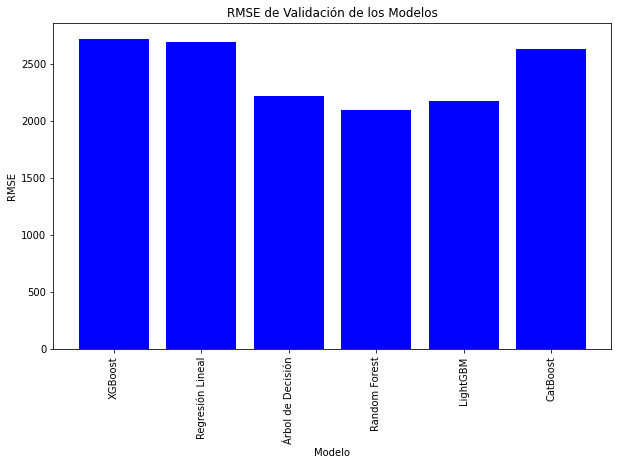

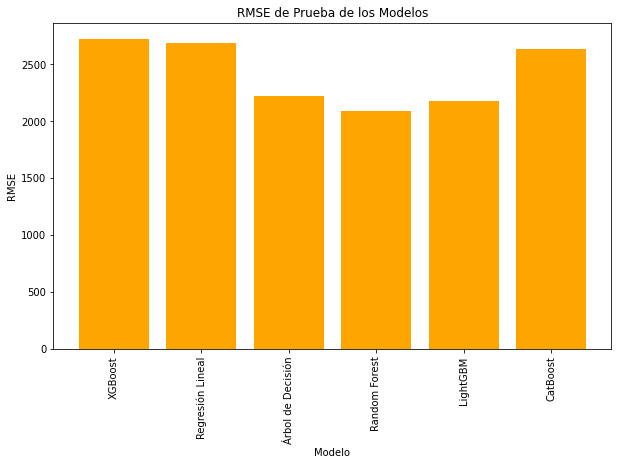

In [64]:
#Crear el dataframe para el RMSE de validación
validation_rmse = pd.DataFrame({
    'Modelo': ['XGBoost', 'Regresión Lineal', 'Árbol de Decisión', 'Random Forest', 'LightGBM', 'CatBoost'],
    'RMSE': [rmse_val_xgb_, rmse_val_lr_, rmse_val_dt_, rmse_val_rf_, rmse_val_lgb_, rmse_val_catboost_]
})

#Crear el dataframe para el RMSE de prueba
test_rmse = pd.DataFrame({
    'Modelo': ['XGBoost', 'Regresión Lineal', 'Árbol de Decisión', 'Random Forest', 'LightGBM', 'CatBoost'],
    'RMSE': [rmse_test_xgb_, rmse_test_lr_, rmse_test_dt_, rmse_test_rf_, rmse_test_lgb_, rmse_test_catboost_]
})

#Graficar el gráfico de barras para validación
plt.figure(figsize=(10, 6))
plt.bar(validation_rmse['Modelo'], validation_rmse['RMSE'], color='blue')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.title('RMSE de Validación de los Modelos')
plt.xticks(rotation=90)
plt.show()

#Graficar el gráfico de barras para prueba
plt.figure(figsize=(10, 6))
plt.bar(test_rmse['Modelo'], test_rmse['RMSE'], color='orange')
plt.xlabel('Modelo')
plt.ylabel('RMSE')
plt.title('RMSE de Prueba de los Modelos')
plt.xticks(rotation=90)
plt.show()

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Que buena grafica para comparar. Tambien podria servir una tabla modelo| rmse. Tambine muy bien el uso de iteracion de sobre los hiperparametros ! **Respuesta:** YA CASI LO TIENES, FUERZA ! Solo te queda: 
    
    1. Agregar la tabla de contenido del proyecto 
    2. Revisar las variables precio y potencia.

Logramos ver que el modelo DecisionTreeRegressor es el mas rapido, pero no es el mas efectivo. En cuanto a efectividad, demostrado visualmente, RandomForestRegressor resalto entre los modelos.

# Conclusion Final

Al comenzar tuvimos muchos datos problematicos, como datos atipicos, ausentes, meses y años con inconsistencias (meses y años que no existen), y tuvimos que preprocesar estos datos. Hicimos que los valores atipicos se eliminaran, y luego eliminamos los valores ausentes en vez de tratarlos por los motivos explicados (la interpretacion de nuestros modelos iban a ser desviadas de un analisis cercano a la realidad, pues imputar por moda, mediana o media hubiera afectado nuestro dataset dado a su gran cantidad de valores ausentes en columnas significativas).

Luego hicimos los modelos y los entrenamos. Vimos que muchos de ellos tienen bastantes hiperparametros y usamos la herramienta GridSearchCV, pues es conveniente para optimizar el tiempo y no probar manualmente o a traves de bucles los diferentes tipos de hiperparametros. Usamos como referencia o umbral a nuestra regresion lineal, con la que tuvimos un RMSE de 2688 en el conjunto de validacion, y 2686 en el de prueba. Al finalizar, encontramos que el mejor de nuestros modelos fue el bosque regresor, aunque no se concentro tanto en la optimizacion de modelos para alcanzar un umbral requerido en cuanto a precision, por lo que puede que los hiperparametros jugaron a favor de este modelo. Tambien logramos visualizar que los modelos tienden a demorarse, pues el dataset es grande y al usar OHE (requerido por la regresion lineal y XGBoost) ralentizo el proceso. 

Finalmente sacamos la velocidad de los modelos a traves de la herramienta '%%time', resultando DecisionTreeRegressor como el mas rapido. Luego los resultados de RMSE se expresaron a traves de un grafico hecho de un dataframe que contiene los modelos y sus respectivos RMSE (validacion y prueba), ayudando a visualizar el analisis. Se puede concluir que el modelo RandomForestRegressor en este caso pudo ser efectivo debido a sus hiperparametros y efectividad, por lo que en este caso se deberia usar.

<div class="alert alert-block alert-success">
<b>Comentario revisor</b> <a class="tocSkip"></a>

Que buen analisis, importante tirar datos del rmse menor, y tiempos optimos.</div> 

# Lista de control

Escribe 'x' para verificar. Luego presiona Shift+Enter

- [x]  Jupyter Notebook está abierto
- [x]  El código no tiene errores 
- [x]  Las celdas con el código han sido colocadas en orden de ejecución 
- [x]  Los datos han sido descargados y preparados
- [x]  Los modelos han sido entrenados
- [x]  Se realizó el análisis de velocidad y calidad de los modelos